In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots in notebook
%matplotlib inline


In [6]:
df = pd.read_csv(r'C:\Users\ACER\Documents\DSA\DSA 2\DSA2_2-2567\ML\final project\market_sales\supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


In [8]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [9]:
# Check data types
print("\nData Types:\n", df.dtypes)


Data Types:
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [10]:
# If needed, convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Confirm
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [13]:
print(df.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [14]:
# Group by Product line and calculate mean Gross margin % and mean Rating
product_summary = df.groupby('Product line').agg({
    'gross margin percentage': 'mean',
    'Rating': 'mean'
}).reset_index()

print(product_summary)

             Product line  gross margin percentage    Rating
0  Electronic accessories                 4.761905  6.924706
1     Fashion accessories                 4.761905  7.029213
2      Food and beverages                 4.761905  7.113218
3       Health and beauty                 4.761905  7.003289
4      Home and lifestyle                 4.761905  6.837500
5       Sports and travel                 4.761905  6.916265


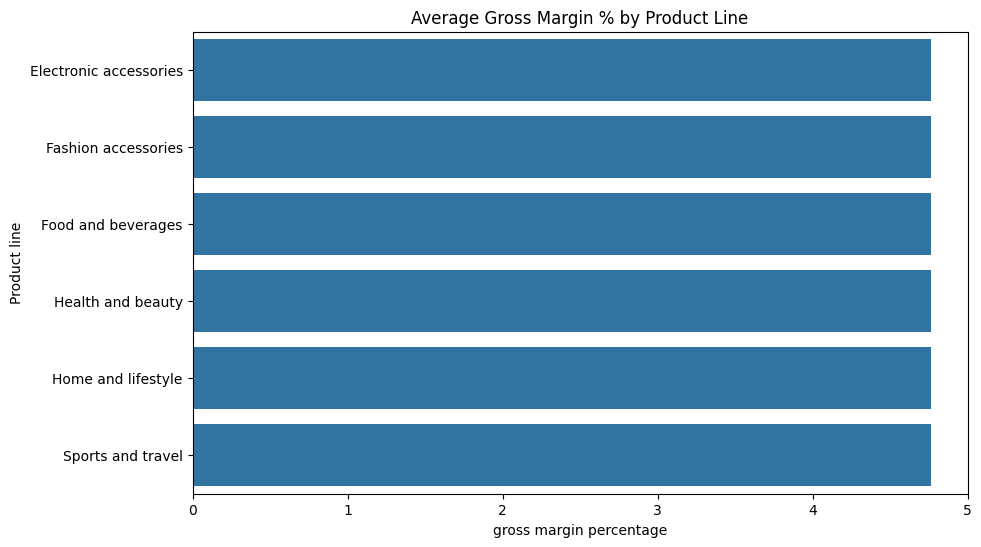

In [19]:
# Plot Gross Margin %
plt.figure(figsize=(10,6))
sns.barplot(
    x='gross margin percentage',
    y='Product line',
    data=product_summary.sort_values('gross margin percentage', ascending=False)
)
plt.title('Average Gross Margin % by Product Line')
plt.show()

             Product line  gross margin percentage    Rating
0  Electronic accessories                 4.761905  6.924706
1     Fashion accessories                 4.761905  7.029213
2      Food and beverages                 4.761905  7.113218
3       Health and beauty                 4.761905  7.003289
4      Home and lifestyle                 4.761905  6.837500
5       Sports and travel                 4.761905  6.916265


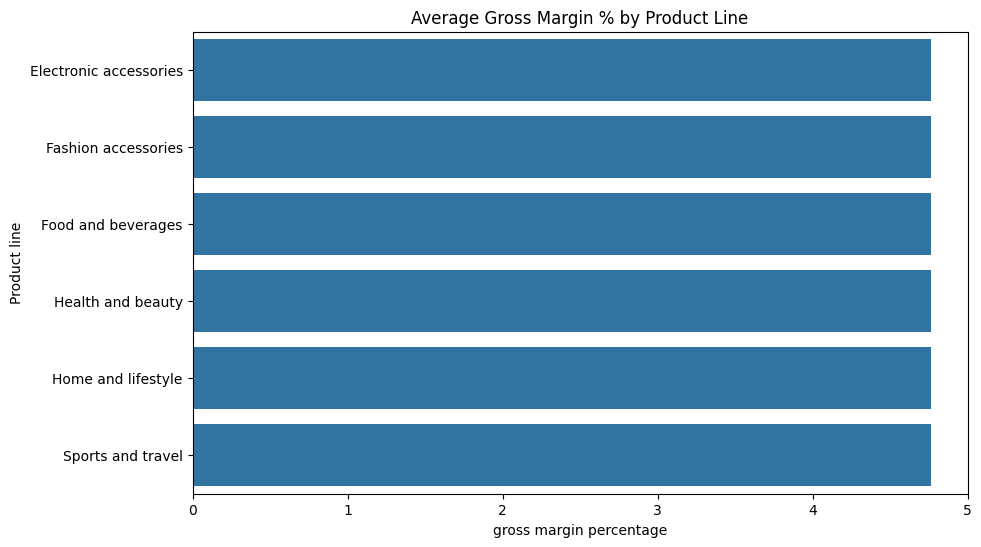

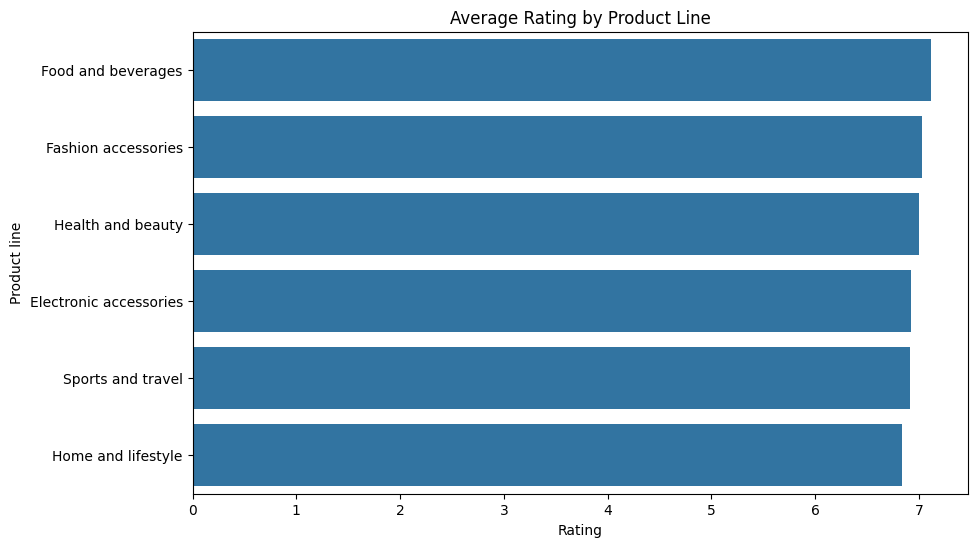

In [20]:
product_summary = df.groupby('Product line').agg({
    'gross margin percentage': 'mean',
    'Rating': 'mean'
}).reset_index()

print(product_summary)

# Plot Gross Margin %
plt.figure(figsize=(10,6))
sns.barplot(
    x='gross margin percentage',
    y='Product line',
    data=product_summary.sort_values('gross margin percentage', ascending=False)
)
plt.title('Average Gross Margin % by Product Line')
plt.show()

# Plot Rating
plt.figure(figsize=(10,6))
sns.barplot(
    x='Rating',
    y='Product line',
    data=product_summary.sort_values('Rating', ascending=False)
)
plt.title('Average Rating by Product Line')
plt.show()

              Product line  Gender  Quantity
0   Electronic accessories  Female       488
1   Electronic accessories    Male       483
2      Fashion accessories  Female       530
3      Fashion accessories    Male       372
4       Food and beverages  Female       514
5       Food and beverages    Male       438
6        Health and beauty  Female       343
7        Health and beauty    Male       511
8       Home and lifestyle  Female       498
9       Home and lifestyle    Male       413
10       Sports and travel  Female       496
11       Sports and travel    Male       424


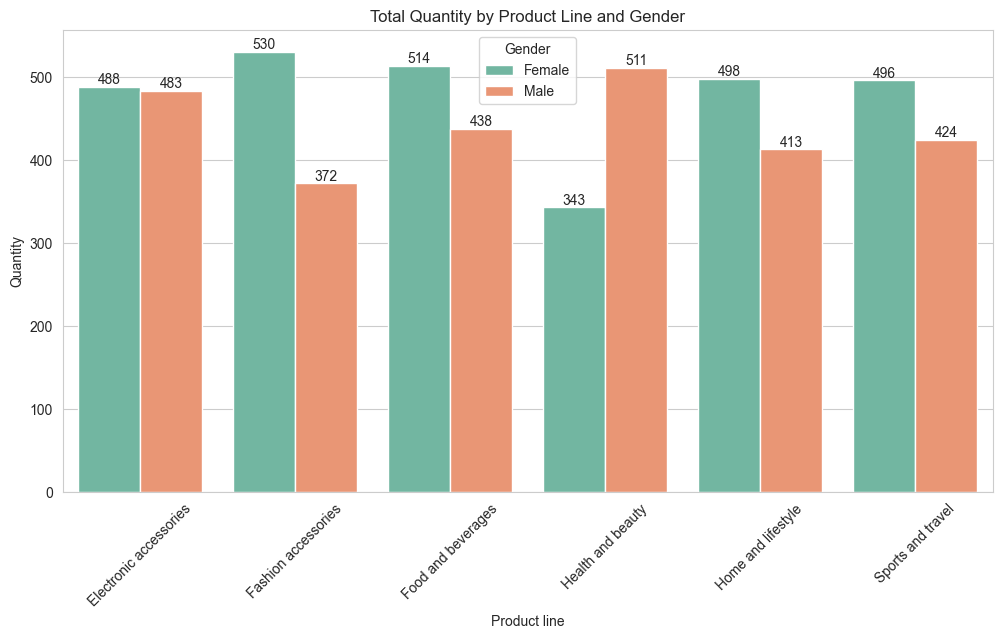

In [21]:
sns.set_style('whitegrid')

# Group by
gender_summary = df.groupby(['Product line', 'Gender']).agg({
    'Quantity': 'sum'
}).reset_index()

print(gender_summary)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    x='Product line',
    y='Quantity',
    hue='Gender',
    data=gender_summary,
    palette='Set2'
)
plt.title('Total Quantity by Product Line and Gender')
plt.xticks(rotation=45)

# ใส่ label
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

plt.show()